In [43]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0,1]
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [37]:
generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/DATASET/Test',
    target_size=(200, 200),
    batch_size=1,
    class_mode='binary',  # No labels are needed
    save_to_dir='/content/drive/MyDrive/DATASET/Train_DA',  # Where to save the generated images
    save_prefix='aug',  # Prefix for the saved images
    save_format='jpg'  # Format of the saved images
)

Found 193 images belonging to 2 classes.


In [38]:
num_augmentations = 5

# Calculate the total number of augmentations needed
total_augmentations_MEN = len(generator.filenames) * num_augmentations

In [39]:
for i in range(total_augmentations_MEN):
    # Generate one batch of images (only one image per batch in this case)
    batch = next(generator)

In [45]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATASET/Train_DA'
valid_path = '/content/drive/MyDrive/DATASET/Test'

In [46]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [47]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/Train_DA',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 965 images belonging to 2 classes.


In [48]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 193 images belonging to 2 classes.


In [49]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=IMAGE_SIZE + [3]),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Flatten(),  # Automatically flattens to (30*30*128) = 115200

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

In [50]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
history = model.fit(training_set,epochs=10,validation_data=test_set)

Epoch 1/10
61/61 [==============================] - 22s 312ms/step - loss: 0.7119 - accuracy: 0.5057 - val_loss: 0.6879 - val_accuracy: 0.5026
Epoch 2/10
61/61 [==============================] - 18s 297ms/step - loss: 0.6721 - accuracy: 0.5948 - val_loss: 0.8365 - val_accuracy: 0.5181
Epoch 3/10
61/61 [==============================] - 18s 295ms/step - loss: 0.6702 - accuracy: 0.6155 - val_loss: 0.6074 - val_accuracy: 0.6736
Epoch 4/10
61/61 [==============================] - 20s 326ms/step - loss: 0.6239 - accuracy: 0.6580 - val_loss: 0.6061 - val_accuracy: 0.6736
Epoch 5/10
61/61 [==============================] - 17s 287ms/step - loss: 0.6254 - accuracy: 0.6508 - val_loss: 0.6114 - val_accuracy: 0.6425
Epoch 6/10
61/61 [==============================] - 18s 289ms/step - loss: 0.5994 - accuracy: 0.6839 - val_loss: 0.5649 - val_accuracy: 0.6839
Epoch 7/10
61/61 [==============================] - 18s 289ms/step - loss: 0.5895 - accuracy: 0.6984 - val_loss: 0.4835 - val_accuracy: 0.7876

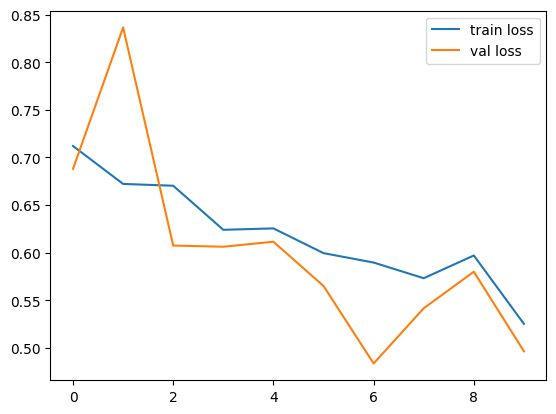

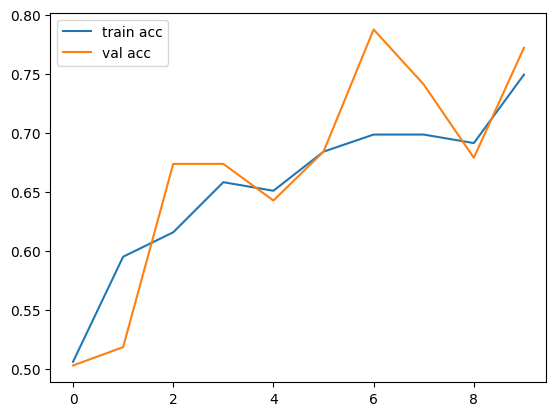

<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [56]:
import cv2

In [87]:
test_img = cv2.imread('images.jpg')

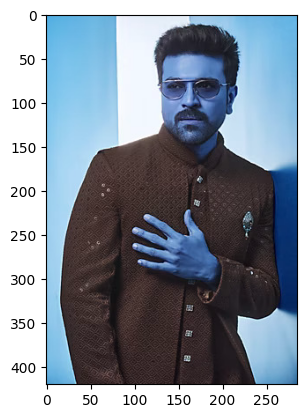

In [88]:
plt.imshow(test_img)


In [89]:
test_img = cv2.resize(test_img,(224,224))
test_inp = test_img.reshape((1,224,224,3))

In [90]:
model.predict(test_inp)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

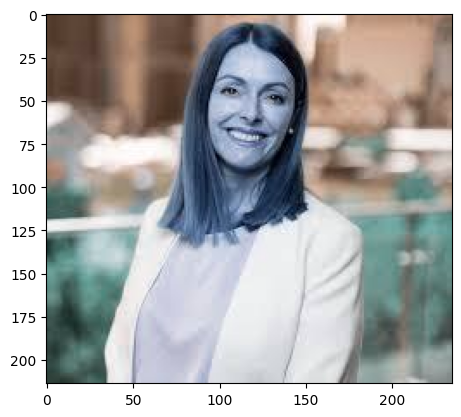

In [75]:
test_img = cv2.imread('download.jpg')
plt.imshow(test_img)

In [76]:
test_img = cv2.resize(test_img,(224,224))
test_input = test_img.reshape((1,224,224,3))

In [77]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [78]:
model.save('Gender_Classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
